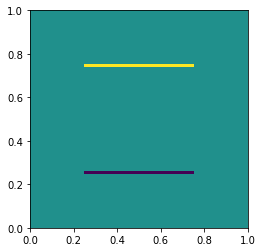

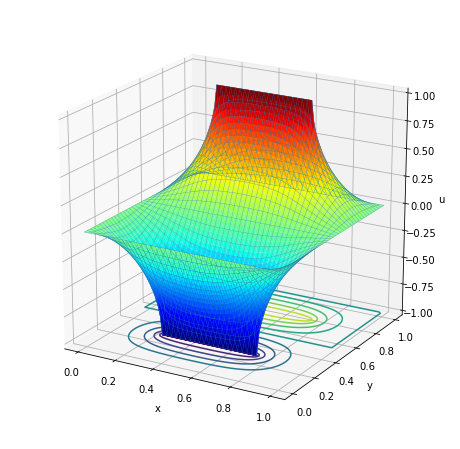

In [2]:
#作业6-3
%matplotlib inline
import math, mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
import numpy as np

eps = 1e-5  # 要求的相对计算精度
L = 1.0  # length of each side
N0 =  20  #单侧1/4空间格点步长的数目
N  =  4*N0+1 # 单侧格点数目，要求是4*N0+1的个数，为了方便设置边界条件。
V0 = 1  # voltage on the parallel plate capacitor

dy = dx = L/(N-1.0)
x = np.array(range(N))*dx
y = np.array(range(N))*dy
(x, y) = np.meshgrid(x, y)
u = np.zeros((N, N))

# boundary conditions
for j in range(N0, 3*N0+1):
    u[j,N0]  = -V0
    u[j,3*N0]= V0 

# compute over-relaxation parameter
omega = 2.0/(1.0+math.sin(math.pi*dx/L))

# white and black pixels: white have j+k even; black have j+k odd
white = [(j, k) for j in range(1, N-1) for k in range(1, N-1) if (j+k)%2 == 0]
black = [(j, k) for j in range(1, N-1) for k in range(1, N-1) if (j+k)%2 == 1]

# 绘画迭代开始初始的电势场
image = plt.imshow(u.T, origin='lower', extent=(0.0, L, 0.0, L))
plt.show()

n = 0  # number of iterations
err = 1.0  # average error per site
while err > eps:
    # next iteration in refinement
    n = n+1
    err = 0.0
    for (j, k) in white+black:  # loop over white pixels then black pixels
        if (k != N0) and (k != 3*N0): 
            du = (u[j-1,k]+u[j+1,k]+u[j,k-1]+u[j,k+1])/4.0-u[j,k]
            err += abs(du)
            u[j,k] += omega*du
        if k == N0 and (j < N0 or j > 3*N0):
            du = (u[j-1,k]+u[j+1,k]+u[j,k-1]+u[j,k+1])/4.0-u[j,k]
            err += abs(du)
            u[j,k] += omega*du
        if k == 3*N0 and (j < N0 or j > 3*N0):
            du = (u[j-1,k]+u[j+1,k]+u[j,k-1]+u[j,k+1])/4.0-u[j,k]
            err += abs(du)
            u[j,k] += omega*du
    err /= N**2

# surface plot of final solution
fig = plt.figure(figsize=(8,8))
axis = fig.gca(projection='3d', azim=-60, elev=20)
surf = axis.plot_surface(x, y, u.T, rstride=1, cstride=1, linewidth=0,
                         cmap=plt.cm.jet)
wire = axis.plot_wireframe(x, y, u.T, rstride=1+N//50, cstride=1+N//50,
                           linewidth=0.25)
axis.contour(x, y, u.T, 10, zdir='z', offset=-1.0)
axis.set_xlabel('x')
axis.set_ylabel('y')
axis.set_zlabel('u')
axis.set_zlim(-1.0, 1.0)
plt.show()